<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#1.-EDA" data-toc-modified-id="1.-EDA-2">1. EDA</a></span></li><li><span><a href="#2.-Features-Selection-&amp;-Engineering" data-toc-modified-id="2.-Features-Selection-&amp;-Engineering-3">2. Features Selection &amp; Engineering</a></span><ul class="toc-item"><li><span><a href="#2.1.-Clean-target-Product-Category" data-toc-modified-id="2.1.-Clean-target-Product-Category-3.1">2.1. Clean target Product Category</a></span></li></ul></li><li><span><a href="#3.-Langage-pre-processing" data-toc-modified-id="3.-Langage-pre-processing-4">3. Langage pre-processing</a></span><ul class="toc-item"><li><span><a href="#Text---feature-'description'" data-toc-modified-id="Text---feature-'description'-4.1">Text - feature 'description'</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Normalize" data-toc-modified-id="Normalize-4.1.0.1">Normalize</a></span></li><li><span><a href="#Remove-stop-words-:-pre-study" data-toc-modified-id="Remove-stop-words-:-pre-study-4.1.0.2">Remove stop words : pre-study</a></span></li><li><span><a href="#Tokenize" data-toc-modified-id="Tokenize-4.1.0.3">Tokenize</a></span></li><li><span><a href="#Filter-stop-words" data-toc-modified-id="Filter-stop-words-4.1.0.4">Filter stop words</a></span></li><li><span><a href="#stemming" data-toc-modified-id="stemming-4.1.0.5">stemming</a></span></li><li><span><a href="#Bag-of-Words" data-toc-modified-id="Bag-of-Words-4.1.0.6">Bag of Words</a></span></li></ul></li></ul></li><li><span><a href="#tf-idf-matrix" data-toc-modified-id="tf-idf-matrix-4.2">tf-idf matrix</a></span></li><li><span><a href="#LDA" data-toc-modified-id="LDA-4.3">LDA</a></span></li><li><span><a href="#NMF-(alternative)" data-toc-modified-id="NMF-(alternative)-4.4">NMF (alternative)</a></span></li></ul></li><li><span><a href="#4.-Image-pre-processing" data-toc-modified-id="4.-Image-pre-processing-5">4. Image pre-processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Size" data-toc-modified-id="Size-5.0.1">Size</a></span></li></ul></li><li><span><a href="#SIFT" data-toc-modified-id="SIFT-5.1">SIFT</a></span></li><li><span><a href="#feature-matching-with-SIFT" data-toc-modified-id="feature-matching-with-SIFT-5.2">feature matching with SIFT</a></span></li></ul></li></ul></div>

Etienne Lardeur 2020 - P6 Project Data Scientist - OpenClassrooms

# Introduction

"Place de marché" wishes to launch its e-marketplace, where sellers offers to customers their products to buy, with a picture and details. <br/>
Until now, any product is unreliabily attached manually to a category. <br/>
The purpose of this Project is to study an automated process to ensure the right attachment of any product to its category : a Classification Engine.<br/>  

Raw Data to start study consist in a csv file and 1050 pictures. <br/>
First step is to perform an EDA and select an adequate {pre-processing, dimension reducer, clusterer} for any {description, picture} of each product. <br/>

Our goal is to provide a visual proof of concept of our classification engine's ability to group products of the same category.

In [1]:
%load_ext pycodestyle_magic
%flake8_on
# PEP8 tested

In [299]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import seaborn as sns
# get the path
import os.path
# opencv
import cv2
# tokenize, vetorize
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
from collections import Counter
from operator import itemgetter
# image
from PIL import Image

# 1. EDA

At this step : is the description we've to work with only the description features, or a set of features we've to select?

In [3]:
# read csv file (products description)
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [4]:
# content
data.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
625,0a3b5fdf77a361c2d7d9b29c259b8c4e,2016-04-18 03:49:23 +0000,http://www.flipkart.com/shopoj-blue-paper-sky-...,SHOPOJ Blue Paper Sky Lantern,"[""Home Decor & Festive Needs >> Decorative Lig...",LTNEHQSPYYBAEWYY,2099.0,1458.0,0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg,False,Key Features of SHOPOJ Blue Paper Sky Lantern ...,No rating available,No rating available,SHOPOJ,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
674,2bf0ca6d25501c067cd12a2a4939443f,2015-12-31 09:19:31 +0000,http://www.flipkart.com/home-fashion-gallery-p...,Home Fashion Gallery Polyester Black Plain Eye...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNECSYF7U72GEQH,2498.0,1499.0,2bf0ca6d25501c067cd12a2a4939443f.jpg,False,Buy Home Fashion Gallery Polyester Black Plain...,No rating available,No rating available,Home Fashion Gallery,"{""product_specification""=>[{""key""=>""Reversible..."
258,9833d0de7f7e1927c807411c10b19189,2015-12-01 12:40:44 +0000,http://www.flipkart.com/ruchikainternational-r...,Ruchikainternational ruc0015 Showpiece - 4 cm,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIECH3WTZ9GH3RU,999.0,499.0,9833d0de7f7e1927c807411c10b19189.jpg,False,Buy Ruchikainternational ruc0015 Showpiece - ...,No rating available,No rating available,Ruchikainternational,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [5]:
# size
data.shape

(1050, 15)

The file consist in 1050 entries and 15 features, with image containing the name of the picture file (pattern unique_id.jpg).

In [6]:
# possible primary keys (no duplicate)
no_duplicate_feat = [
    col for col in data.columns if len(data[col].unique()) == len(data[col])]
print("features without duplicate : {}".format(no_duplicate_feat))

features without duplicate : ['uniq_id', 'product_url', 'product_name', 'pid', 'image', 'description']


Among those features, we understang that uniq_id & image (as uniq_id.jpg) are the same identifier, while pid is an alternate id that links to url, built out of numerous features, including this pid.

In [7]:
# missing data
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Brand name is missing 338 times and seems to be optional in this study (could give key of cat descriptor. <br/>

In [8]:
# replace nan brand by '' (no brand name)
data['brand'] = data['brand'].fillna('')

In [9]:
# remove useless columns
data = data.drop(columns=[
    'uniq_id',
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'product_specifications',
])

In [10]:
# concatenate extended extd_description of a product
data['extd_description'] = data['brand'] + ' ' + data['product_name'] + ' ' + data['description']

Decision to go on with image. Need to ensure consistency between 'image' and jpg pictures files in folder.

In [14]:
# check link consistency (return 0 if ok)
# jpg_list : files in folders
jpg_list = os.listdir('Data/Images')
# image_list : filenames in dataset
image_list = data['image'].tolist()
len(set(image_list) - set(jpg_list))

0

In [21]:
# build image file path from data['image']
img_name = data['image'][85]
img_path = os.path.join('Data/Images', img_name)

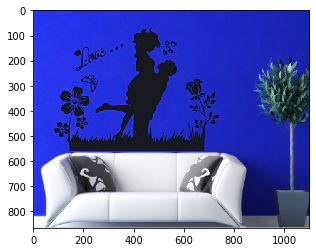

In [26]:
# read and show
img = cv2.imread(img_path)
plt.imshow(img)

In [41]:
# show image - the PIL way
img = Image.open(img_path)
img.show()

In [30]:
# blue <-> red shall be switched : convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

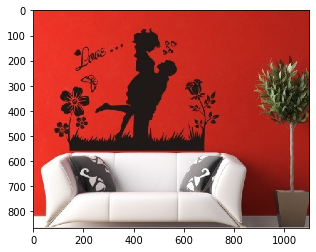

In [42]:
# check transformation
plt.imshow(img)

# 2. Features Selection & Engineering

At this step, a minimal selection of input is : image & description, with target to catch within product_category_tree. 

## 2.1. Clean target Product Category

Idea is to extract from the product_category_tree, a list of categories. We've to find the right decomposition's level and the corresponding list to work with. <br/>
Our interpretation of a right decomposition's level is the adequate balance of items available to learn from the dataset, i.e. :
- enough products available in the train set  <br/>
- the less dissimilarity between products of a given category <br/>

While the first criteria belongs to basic EDA, the second one is more complex and will be the result of words and picture pre-precessing.

In [218]:
# work on category tree
data.loc[0, 'product_category_tree']

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [219]:
len(data.loc[0, 'product_category_tree'])

112

The tree consists in level separated by ">>", that may be cut with "..."

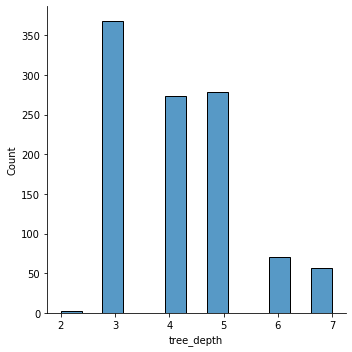

In [220]:
# nb of decomposition's levels
data['tree_depth'] = data['product_category_tree'].apply(
    lambda x: len(x.split('>>')))
sns.displot(data['tree_depth'])

In [221]:
# flaten category levels
cat_levels = []
for i in range(1, 8):
    cat_levels.append('cat_lvl_'+str(i))

In [222]:
# flaten category_tree as levels cat_lvl
for index in data.index:
    depth = len(
        data.loc[
            index, 'product_category_tree'].split("\"")[1].split(" >> "))
    for i, lvl in enumerate(cat_levels):
        if i + 1 <= depth:
            data.loc[
                index, lvl] = data.loc[
                index, 'product_category_tree'].split("\"")[1].split(" >> ")[i]

In [223]:
data.head(3)

,product_name,product_category_tree,image,description,brand,extd_description,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Elegance Elegance Polyester Multicolor Abstrac...,4,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Sathiyas Sathiyas Cotton Bath Towel Specificat...,5,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Eurospa Eurospa Cotton Terry Face Towel Set Ke...,5,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,NaN,NaN


In [224]:
# remove unvalid categories (cutted level names)
for lvl in cat_levels:
    mask = data[lvl].str.contains(r'\.\.\.', na=False)
    data[lvl][mask] = np.nan

C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [225]:
data.head(3)

,product_name,product_category_tree,image,description,brand,extd_description,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Elegance Elegance Polyester Multicolor Abstrac...,4,Home Furnishing,Curtains & Accessories,Curtains,NaN,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Sathiyas Sathiyas Cotton Bath Towel Specificat...,5,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,NaN,NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Eurospa Eurospa Cotton Terry Face Towel Set Ke...,5,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,NaN,NaN,NaN


In [226]:
# see how many valid values are available for each lvl
for lvl in cat_levels:
    print(lvl + ' has %d valid values' % len(data[lvl].unique()))

cat_lvl_1 has 7 valid values
cat_lvl_2 has 62 valid values
cat_lvl_3 has 239 valid values
cat_lvl_4 has 318 valid values
cat_lvl_5 has 217 valid values
cat_lvl_6 has 96 valid values
cat_lvl_7 has 51 valid values


Text(0.5, 1.02, 'Level 1 Prodcut Categories')

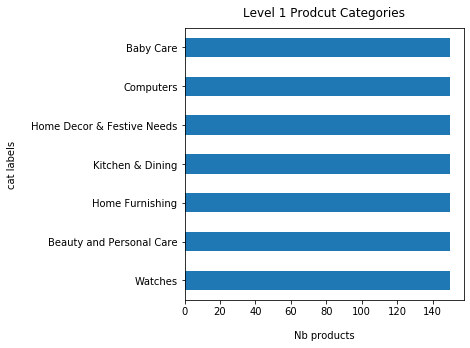

In [227]:
data['cat_lvl_1'].value_counts().plot(
    kind='barh',
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('Nb products', labelpad=14)
plt.ylabel('cat labels', labelpad=14)
plt.title('Level 1 Prodcut Categories', y=1.02)

Each level 1 cat is populated by 1/7 of the products (150 out of 1050). <br/>
Next level comes with 62 labels, meaning we could expect an average of 17.5 products. Let's see how is this balanced.

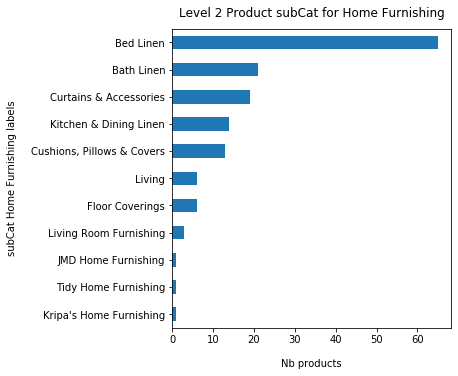

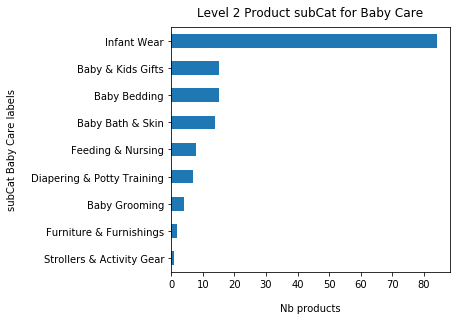

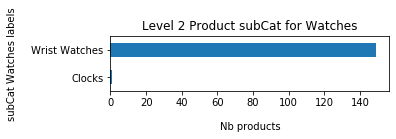

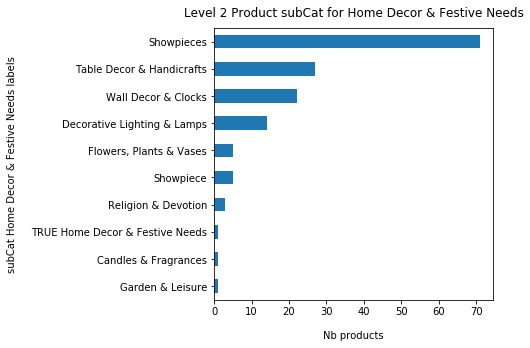

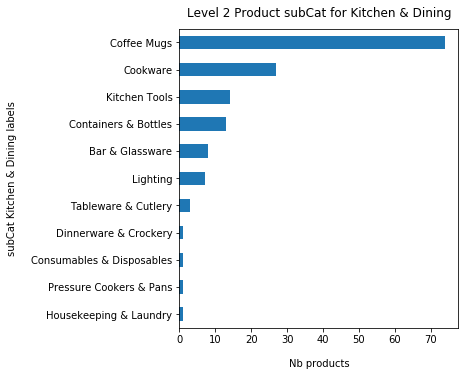

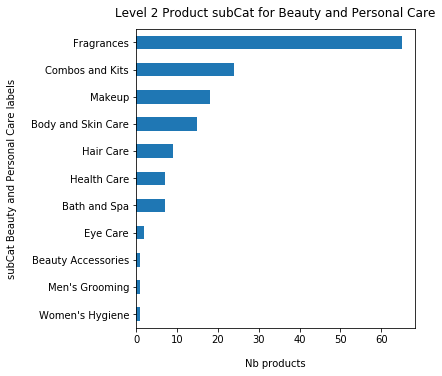

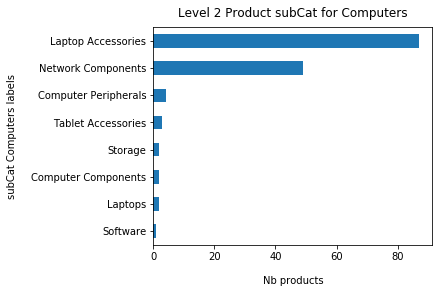

In [228]:
for cat in data['cat_lvl_1'].unique():
    subset = data[data['cat_lvl_1'] == cat]
    size = len(subset['cat_lvl_2'].unique()) / 2
    subset['cat_lvl_2'].value_counts().plot(
        kind='barh',
        figsize=(5, size)).invert_yaxis()
    plt.xlabel('Nb products', labelpad=14)
    plt.ylabel('subCat ' + str(cat) + ' labels', labelpad=14)
    plt.title('Level 2 Product subCat for ' + str(cat), y=1.02)
    plt.show()

this lead to a quite unbalanced division. 

if a sublevel contains a sudivision into products with very distinct expected pictures, this would be interesting either to keep those sublevel, or remove the alternate product. <br/>
for instance, this would lead to level 2 cat, dropping those without enough images to learn from.

# 3. Langage pre-processing

## Text - feature 'description'

There is a bunch of various ways to pre-process text. We simply get rid of punctuation, switch to lower case, suppress stopwords. Then we compute tf-idf matrix.

Créer des paires de document (article, highlights)

Suppression de la ponctuation

Séparation en token en minuscules

Suppression des stopwords pour les articles

Calcul des fréquences et tf-idf sur les deux types de documents

Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\etien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# descriptions to work with
descriptions = data['description'].to_list()

In [31]:
# pick a description randomly
descriptions[randint(0, 1050)]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

#### Normalize 
Switch to lower case and filter on alphabetic without punctuation.

In [32]:
# lower case
descriptions = list(map(str.lower, descriptions))
# remove punctuation through regex
punctuation = re.compile(r'[_.,;\/#!?:()&-]+')
descriptions = [re.sub(punctuation, ' ', x) for x in descriptions]
# remove numeric data
numeric = re.compile(r'\d+')
descriptions = [re.sub(numeric, '', x) for x in descriptions]

#### Remove stop words : pre-study

In [33]:
# gather & tokenize any descriptions
any_descriptions = ' '.join(descriptions)
words = nltk.word_tokenize(any_descriptions)

In [34]:
# calculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 25 words
for word, frequency in fdist.most_common(25):
    print(u'{}:{}'.format(word, frequency))

of:1757
for:1447
the:1363
and:1332
to:1056
in:1053
rs:911
only:890
with:843
on:835
a:722
at:714
your:656
is:638
products:631
free:618
buy:581
delivery:567
genuine:564
shipping:564
cash:564
replacement:559
cm:543
day:540
flipkart:481


In [35]:
# set & remove default stopwords
default_stopwords = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word not in default_stopwords]

In [36]:
# recalculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 20 words
custom_stopwords = set()
for word, frequency in fdist.most_common(20):
    custom_stopwords.add(word)
    print(u'{}:{}'.format(word, frequency))

rs:911
products:631
free:618
buy:581
delivery:567
genuine:564
shipping:564
cash:564
replacement:559
cm:543
day:540
flipkart:481
com:473
guarantee:471
online:396
features:395
specifications:371
price:352
watch:330
color:328


In [37]:
words = [word for word in words if word not in custom_stopwords]

In [38]:
# recalculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 20 words
for word, frequency in fdist.most_common(20):
    print(u'{}:{}'.format(word, frequency))

mug:327
baby:320
pack:317
's:317
material:312
set:311
type:304
cotton:299
box:292
general:288
package:269
analog:262
sales:261
number:253
warranty:250
quality:245
details:235
product:233
brand:232
best:230


we could go back to that step and remove/keep manually custom words, e.g. does watch refers to the product? we should'nt get more than 150 Watches : watch. And we saw a "'s" useless word, not removed yet.

#### Tokenize

In [39]:
# tokenize any description
tokens = list(map(nltk.word_tokenize, descriptions))

#### Filter stop words

In [40]:
# remove stop words
all_stopwords = custom_stopwords | default_stopwords
filtered_tokens = list()
for descriptions in tokens:
    descriptions_ = list()
    for word in descriptions:
        if word not in all_stopwords:
            descriptions_.append(word)
    filtered_tokens.append(descriptions_)

#### stemming

In [41]:
# compare PorterStemmer and LancasterStemmer effects
porter = nltk.stem.PorterStemmer()
lancaster = nltk.stem.LancasterStemmer()

In [42]:
porter_words = nltk.word_tokenize(porter.stem(any_descriptions))

In [43]:
len(porter_words)

77060

In [44]:
lancaster_words = nltk.word_tokenize(lancaster.stem(any_descriptions))

In [45]:
len(lancaster_words)

77060

! stemming seems not having any effect on size (no rationalization of words with same "stem")

In [54]:
# use porter
stemmed_tokens = list()
for descriptions in filtered_tokens:
    descriptions_ = list()
    for word in descriptions:
        descriptions_.append(porter.stem(descriptions))
    stemmed_tokens.append(descriptions_)

AttributeError: 'list' object has no attribute 'lower'

#### Bag of Words

In [55]:
bag_of_words = []

for description in filtered_tokens:
    bag_of_words.append(Counter(description))

In [56]:
bag_of_words = pd.DataFrame.from_records(bag_of_words)

In [57]:
bag_of_words.shape

(1050, 5147)

In [58]:
bag_of_words.fillna(0, inplace=True)

In [59]:
bag_of_words.sum(axis=0)[bag_of_words.sum(axis=0) < 5]

stitch         2.0
environment    4.0
romantic       1.0
loving         1.0
wrinkle        3.0
              ... 
practice       2.0
instruction    2.0
uberlyfe       4.0
polyvinyl      2.0
films          2.0
Length: 3564, dtype: float64

In [60]:
data['word_tk'] = data['description'].apply(nltk.word_tokenize)

In [61]:
data['word_tk']

0       [Key, Features, of, Elegance, Polyester, Multi...
1       [Specifications, of, Sathiyas, Cotton, Bath, T...
2       [Key, Features, of, Eurospa, Cotton, Terry, Fa...
3       [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
4       [Key, Features, of, Jaipur, Print, Cotton, Flo...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, (...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, for, Rs...
Name: word_tk, Length: 1050, dtype: object

## tf-idf matrix
terms importance weighting within one description among all the possible descriptions :
- Term Frequency : how often the term occurs within any single description
- x Inverse Document Frequency : how rarely are the description where term occurs, accross any drescriptions (inverse log +1)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create tf-idf vectorizer
tfidf_matrix_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data['description']
matrix = tfidf_matrix_vectorizer.fit_transform(corpus)

# densify ?
matrix_dense = matrix.todense()

In [63]:
matrix_feature_names = tfidf_matrix_vectorizer.get_feature_names()

In [64]:
matrix

<1050x2442 sparse matrix of type '<class 'numpy.float64'>'
	with 32556 stored elements in Compressed Sparse Row format>

In [65]:
matrix_dense.shape

(1050, 2442)

In [66]:
len(tfidf_matrix_vectorizer.stop_words_)

3400

In [68]:
import operator

# build vocab
vocab = sorted(
    tfidf_matrix_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

# sorted list of words
vocab = [word for (word, word_indice) in vocab]

# create matrix
tfidf_matrix = pd.DataFrame(matrix_dense, columns=vocab)

tfidf_matrix.head()

,001,005,01,03,04,05tg,06,085,099,10,...,yes,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.074495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04614,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.040360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.034580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
np.count_nonzero(tfidf_matrix['mug'], axis=0)

75

! we should try to put our manual pre-processing into sklearn tf-idf vectorization :
- token_pattern, to remove numbers (or a specific tokenizer)
- custom stop words
- max_df : according to our custom stop words (! une vingtaine seulement)
- min_df : not calculated yet


In [71]:
tfidf_matrix_vectorizer.stop_words_

{'ma897lla',
 'palm',
 'media',
 'suttle',
 'tt',
 'motif',
 'reader',
 'proto',
 '1143',
 'copperware',
 'g6',
 'sparkling',
 'ndura',
 'pmr1336',
 'growing',
 'contrl',
 'zinc',
 'resistence',
 'raring',
 'sport',
 'countrymen',
 '6949',
 'spangle',
 'watt',
 'revives',
 '2840',
 'cocoa',
 'tele',
 '8097ym03',
 'chota',
 'result',
 'explode',
 'polypropylene',
 'norms',
 '460',
 'cardiac',
 'practical',
 'ta',
 'spring',
 'dungri',
 '999store',
 'faux',
 '552',
 'carrot',
 '535',
 'turtle',
 'cranberry',
 'priceless',
 'amber',
 '2301',
 'tsw',
 'marvellous',
 '2222',
 'cancan',
 'internal',
 'casserole',
 'entertaining',
 'australian',
 'hpl816x3',
 'poppins',
 'rishan',
 'saving',
 'aware',
 'profiles',
 '069',
 'w6701005',
 'grains',
 'rked',
 'subtype',
 'ageless',
 'dmk',
 'relaxed',
 'lice',
 'pristine',
 'saco',
 'numero',
 'photography',
 'perfrect',
 'jeans',
 'vajrasattva',
 'sos07',
 'surgeon',
 'chemical',
 'compass',
 '105key',
 'correction',
 '130',
 'botanically',
 'ar

## LDA 

build topics out of data

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# create count vectorizer
tf_vectorizer = CountVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data['description']
tf = tf_vectorizer.fit_transform(corpus)


In [73]:
# try as much topics as first category levels
n_topics = 7
# Instanciate LDA
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0)
# apply lda
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=0)

In [74]:
# to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [75]:
# the 7 topics lda way
display_topics(lda, tf_vectorizer.get_feature_names(), 20)

Topic 0:
showpiece products brass art price bowl cm gold towel box face set beautiful towels home bath soft bowls ganesha cream
Topic 1:
adapter battery laptop replacement power quality warranty charger vgn vaio product 19 smartpro 5v usb designed 9a lapguard voltage 75
Topic 2:
mugs mug perfect bring coffee ceramic love beautifully designed make prithish quality special designs affordable gifts holiday don just sure
Topic 3:
mug ceramic coffee perfect material home hair product gift price safe design quality tea size loved ml specifications rockmantra exclusive
Topic 4:
cm features pack specifications general color baby package sales number box type model cotton laptop warranty brand print key fabric
Topic 5:
products delivery buy genuine shipping cash free 30 day replacement guarantee flipkart com online prices best cm showpiece india watch
Topic 6:
skin analog watch sticker shapes men combo wall women vinyl laptop set resistant mouse apply great water dial pad free


## NMF (alternative)

input : tf_idf matrix (dense or not seems ok)

In [76]:
from sklearn.decomposition import NMF

In [85]:
# keep same topics size than lvl 1 cat
no_topics = 7

# create NMF
nmf = NMF(
    n_components=no_topics,
    random_state=1,
    alpha=.1,
    l1_ratio=.5,
    init='nndsvd')

# Fitting the model
nmf.fit(matrix)


NMF(alpha=0.1, init='nndsvd', l1_ratio=0.5, n_components=7, random_state=1)

In [86]:
# the 7 topics nmf way
display_topics(nmf, matrix_feature_names, 20)

Topic 0:
com flipkart cash genuine shipping delivery products free buy guarantee 30 replacement day set combo online abstract blanket single double
Topic 1:
watch analog men discounts india great women sonata online dial maxima strap guarantee 30 replacement com day flipkart boys resistant
Topic 2:
baby girl details fabric cotton dress boy sleeve neck shirt pattern ideal casual fit printed wash occasion contents general specifications
Topic 3:
rockmantra mug ceramic stays crafting porcelain thrilling permanent ensuring start creation making years dishwasher exclusive ones come pick microwave fresh
Topic 4:
showpiece cm prices best online 30 guarantee replacement day kadhai cash shipping genuine delivery buy products free usb led 10
Topic 5:
cm pack color model warranty features package box design sales inch number polyester material cover multicolor type specifications skin laptop
Topic 6:
mug coffee ceramic mugs tea perfect printland prithish presented wardrobe morning serve fantastic

# 4. Image pre-processing

sort images by category?
after processing

cv2 seems better that PIL

### Size

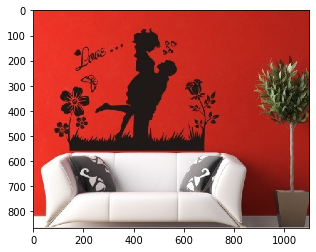

In [68]:
# build image file path
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [69]:
print(img.shape)

(866, 1100, 3)


In [46]:
# get and store image sizes
size = []
for ind in data.index:
    img = cv2.imread(
        os.path.join(
            'Data/Images',
            data['image'].loc[ind]))
    size.append([img.shape[0], img.shape[1]])

In [56]:
sizes = pd.DataFrame(size)

In [59]:
sizes.columns = ['height', 'width']

In [60]:
sizes.head()

,height,width
0,3600,3600
1,1293,2388
2,729,982
3,831,1100
4,2088,2670


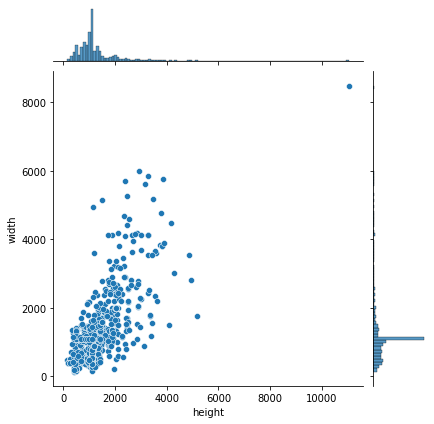

In [63]:
# overview of image sizes
sns.jointplot(
    x=sizes['height'],
    y=sizes['width'],
    data=sizes)

In [79]:
# resize image without distorsion with openCV, thx to stackoverflow J

def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w:
        return cv2.resize(img, (size, size), interpolation)
    if h > w:
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        # comment original mask : black
        # mask = np.zeros((dif, dif), dtype=img.dtype)
        # new mask : white
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        # comment original mask : black
        # mask = np.zeros((dif, dif, c), dtype=img.dtype)
        # new mask : white
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

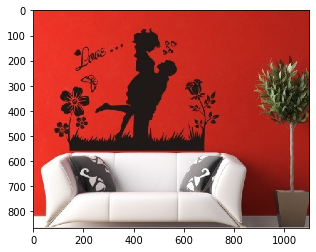

In [80]:
# get back to our sample
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

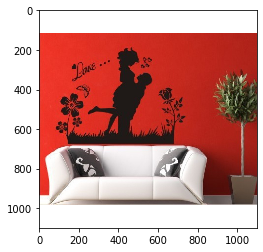

In [81]:
scaled_img = resize2SquareKeepingAspectRation(
    img,
    1100,
    interpolation=cv2.INTER_AREA)
plt.imshow(scaled_img)

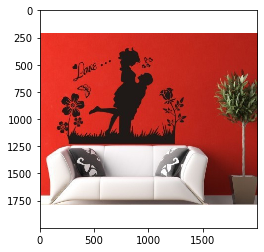

In [86]:
scaled_img = resize2SquareKeepingAspectRation(
    img,
    2000,
    interpolation=cv2.INTER_AREA)
plt.imshow(scaled_img)

## SIFT

In [184]:
# sift features extractor
sift = cv2.xfeatures2d.SIFT_create()

In [185]:
# extract features @path
def extract_features(img_path, model):

    # load image and convert it to grayscale
    # img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # load image
    img = cv2.imread(img_path)
    # detect key points and descriptors
    keypoints, descriptors = model.detectAndCompute(img, None)

    # returns keypoints and descriptors
    return keypoints, descriptors

In [186]:
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)

In [187]:
img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

In [188]:
# keypoints & descriptors of the sample image
img_keypoints, img_descriptors = extract_features(img_path, sift)

In [191]:
# paste to image
img_sift = cv2.drawKeypoints(image=img,
                             keypoints=img_keypoints,
                             outImage=None,
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

Text(0.5, 1.0, 'SIFT descriptors')

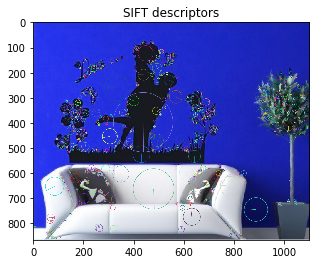

In [192]:
plt.imshow(img)
plt.imshow(img_sift)
plt.title("SIFT descriptors")

In [193]:
img_descriptors.shape

(1453, 128)

In [200]:
img_name = data['image'].loc[84]
img_path = os.path.join('Data/Images', img_name)

In [201]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [202]:
# keypoints & descriptors of the sample image
img_keypoints, img_descriptors = extract_features(img_path, sift)

In [203]:
# paste to image
img_sift = cv2.drawKeypoints(image=img,
                             keypoints=img_keypoints,
                             outImage=None,
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

(-0.5, 877.5, 1335.5, -0.5)

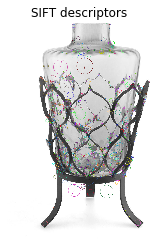

In [204]:
plt.imshow(img)
plt.imshow(img_sift)
plt.title("SIFT descriptors")
plt.axis('off')

In [205]:
img_descriptors.shape

(1669, 128)

while number of features is alwayds 128 for SIFT, the number of descriptors is not the same for different pictures.

Gray- scale images rather than color images are generally used to get SIFT descriptors in order to reduce the complexity. The regions which have a similar grayscale level but different hues tend to produce wrong matching results in this case.

In [246]:
# initializations
dir_read = 'Data/Images'
dir_write = 'Data/Processed_Images'

for index, row in data.iterrows():
    # get url of the product's image
    img_name = row['image']
    # create the path to the image file
    img_path = os.path.join(dir_read, img_name)
    # Read the file and convert it to color image
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    # resize the image to 224*224 pixels
    img_sqr = resize2SquareKeepingAspectRation(
        img_rgb,
        size=500,
        interpolation=cv2.INTER_AREA)
    # auto-adjustment of contrast and luminosity
    # img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    # save the preprocessed image
    if not os.path.exists(os.path.join(dir_write, row['cat_lvl_1'])):
        os.makedirs(os.path.join(dir_write, row['cat_lvl_1']))
    img_preprocessed_path = os.path.join(dir_write, row['cat_lvl_1'], img_name)
    cv2.imwrite(img_preprocessed_path, img_sqr)

19:80: E501 line too long (80 > 79 characters)


## feature matching with SIFT

based on the assumption that a better matching would enhance classification

In [311]:
def assessMatching(img1, img2):
    # sift
    sift = cv2.xfeatures2d.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

    # feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1, descriptors_2)
    matches = sorted(matches, key=lambda x: x.distance)

    img1_sift = cv2.drawKeypoints(image=img1,
                                  keypoints=keypoints_1,
                                  outImage=None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    img2_sift = cv2.drawKeypoints(image=img2,
                                  keypoints=keypoints_2,
                                  outImage=None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    img3 = cv2.drawMatches(img1,
                           keypoints_1,
                           img2,
                           keypoints_2,
                           matches[:50],
                           img2,
                           flags=2)

    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(img1_sift)
    ax1.title.set_text('img1 keypoints')
    ax1.axis('off')
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(img2_sift)
    ax2.title.set_text('img2 keypoints')
    ax2.axis('off')
    ax3 = fig.add_subplot(gs[1, :])
    ax3.imshow(img3)
    ax3.title.set_text('matching')
    ax3.axis('off')
    plt.show()

    print('number of keypoints left image : %d' % len(keypoints_1))
    print('number of keypoints right image : %d' % len(keypoints_2))
    print('total number of matches : %d ' % len(matches))

17:80: E501 line too long (83 > 79 characters)
22:80: E501 line too long (83 > 79 characters)


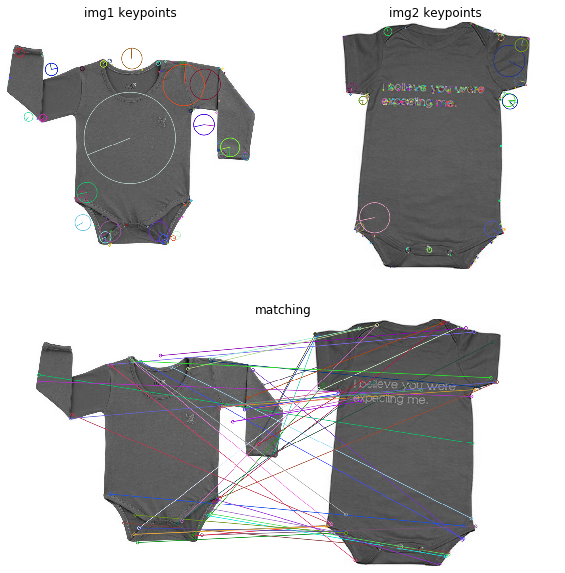

number of keypoints left image : 107
number of keypoints right image : 313
total number of matches : 69 


In [309]:
# read two images
img1 = cv2.imread(
    'Data/Processed_Images/Baby Care/2c8912b849cf73676d025aa99203b6d1.jpg')
img2 = cv2.imread(
    'Data/Processed_Images/Baby Care/46ca672fdfff8a1b3641642a9795344a.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

assessMatching(img1, img2)

In [260]:
len(keypoints_2)

313

In [261]:
descriptors_2.shape

(313, 128)

In [ ]:
keypoints_1